In [ ]:
çoimport pandas as pd
import seaborn as sns
import numpy as np

Data Understanting

In [ ]:
df = pd.read_csv("streaming_data.csv")
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

Colunas com null: Age, Gender, Time_on_plataform, Devices_connected, Subscription_type, Num_streaming_services, Avg_rating, Churned

Data Preparation

In [ ]:
df[['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']] = df[['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']].fillna(0)

In [ ]:
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform              0
Devices_connected             0
Subscription_type         25221
Num_streaming_services        0
Num_active_profiles           0
Avg_rating                    0
Churned                       0
User_id                       0
dtype: int64

Colunas com null: Age, Gender, Subscription_type

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Age                       0
Gender                    0
Time_on_platform          0
Devices_connected         0
Subscription_type         0
Num_streaming_services    0
Num_active_profiles       0
Avg_rating                0
Churned                   0
User_id                   0
dtype: int64

In [ ]:
df['Churned'] = df['Churned'].replace(1, 'Yes')
df['Churned'] = df['Churned'].replace(0, 'No')

In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024.0,2.0,Basic,0.0,1,0.00,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [ ]:
df.dtypes

Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                    object
User_id                    object
dtype: object

In [ ]:
df[['Age', 'Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Avg_rating']] = df[['Age', 'Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Avg_rating']].astype('int64')

In [ ]:
df.dtypes

Age                        int64
Gender                    object
Time_on_platform           int64
Devices_connected          int64
Subscription_type         object
Num_streaming_services     int64
Num_active_profiles        int64
Avg_rating                 int64
Churned                   object
User_id                   object
dtype: object

Modelagem de Dados

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             recall_score,
                             precision_score)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
cols_drop = df[['Churned', 'User_id']]

X = df.drop((cols_drop), axis=1)

y = df['Churned']

In [ ]:
le = LabelEncoder()

le.fit(X.Gender)
X.Gender = le.transform(X.Gender)

le.fit(X.Subscription_type)
X.Subscription_type = le.transform(X.Subscription_type)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
X.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating
0,49,1,4700,3,0,0,3,0
1,69,0,6107,2,2,0,1,2
2,44,1,6374,3,1,1,1,1
3,26,1,0,5,0,0,2,0
5,54,1,3024,2,0,0,1,0


In [ ]:
scaler = MinMaxScaler()

scaler.fit(X)
scaler.transform(X_train)
scaler.transform(X_test)

array([[0.58823529, 1.        , 0.12227423, ..., 0.        , 0.5       ,
        0.        ],
       [0.1372549 , 0.        , 0.33348556, ..., 0.        , 0.5       ,
        0.8       ],
       [0.21568627, 1.        , 0.        , ..., 0.        , 0.5       ,
        0.        ],
       ...,
       [0.62745098, 0.        , 0.77040758, ..., 0.        , 0.5       ,
        0.        ],
       [0.1372549 , 1.        , 0.83639685, ..., 0.        , 0.75      ,
        0.4       ],
       [0.92156863, 1.        , 0.29261331, ..., 0.        , 0.5       ,
        0.6       ]])

In [ ]:
X_train.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating
69609,66,0,4706,5,0,0,3,1
33815,47,1,0,4,2,0,4,0
2411,25,1,5451,2,1,0,4,1
6257,40,1,0,1,0,0,3,1
31452,55,0,606,2,2,0,1,4


In [ ]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

c:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.predict(X_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
X_test.assign(churn=y_test).assign(labe=lr.predict(X_test))

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,churn,labe
20635,48,1,1071,2,2,0,3,0,No,No
40794,25,0,2921,4,2,0,3,4,No,No
16428,29,1,0,3,1,0,3,0,No,No
1636,41,1,6236,0,2,0,5,3,No,No
14264,51,1,1097,4,0,0,4,2,No,No
...,...,...,...,...,...,...,...,...,...,...
15026,43,0,6417,3,2,0,2,0,No,No
26182,51,1,8670,3,2,0,2,1,Yes,No
28957,50,0,6748,5,0,0,3,0,No,No
53638,25,1,7326,0,0,0,4,2,Yes,No


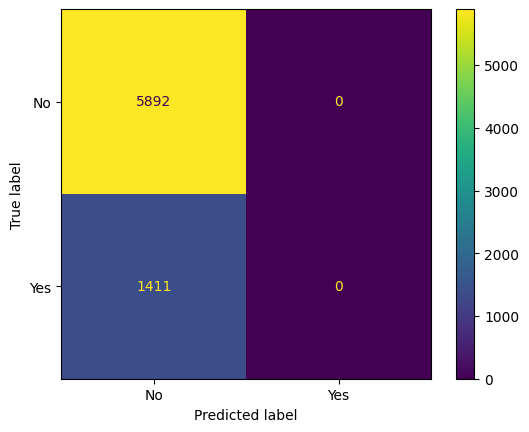

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")

Acurácia (Treino): 0.8067574969190744
Acurácia (Teste): 0.8067917294262632


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

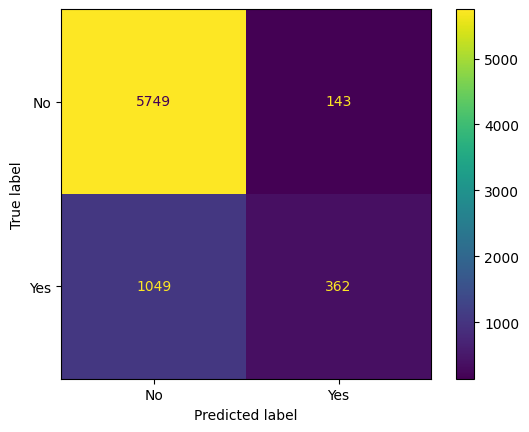

In [ ]:

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [ ]:
print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")

Acurácia (Treino): 0.9944201013282212
Acurácia (Teste): 0.8367794057236752


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10],
              'n_estimators': [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring="accuracy", cv=5, n_jobs=-1)


In [ ]:
grid_search.fit(X_train, y_train)

c:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [ ]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_tunned = RandomForestClassifier(bootstrap = True,
    ccp_alpha = 0.0,
    class_weight = None,
    criterion = 'gini',
    max_depth = 10,
    max_features = 'sqrt',
    max_leaf_nodes = None,
    max_samples = None,
    min_impurity_decrease = 0.0,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_weight_fraction_leaf = 0.0,
    monotonic_cst = None,
    n_estimators = 100,
    n_jobs = None,
    oob_score = False,
    random_state = None,
    verbose = 0,
    warm_start = False)

rf_tunned

RandomForestClassifier(max_depth=10)

In [ ]:
rf_tunned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
rf_tunned.predict(X_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
X_test.assign(churn=y_test).assign(label=rf_tunned.predict(X_test))

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,churn,label
20635,48,1,1071,2,2,0,3,0,No,No
40794,25,0,2921,4,2,0,3,4,No,No
16428,29,1,0,3,1,0,3,0,No,No
1636,41,1,6236,0,2,0,5,3,No,No
14264,51,1,1097,4,0,0,4,2,No,No
...,...,...,...,...,...,...,...,...,...,...
15026,43,0,6417,3,2,0,2,0,No,No
26182,51,1,8670,3,2,0,2,1,Yes,No
28957,50,0,6748,5,0,0,3,0,No,No
53638,25,1,7326,0,0,0,4,2,Yes,No


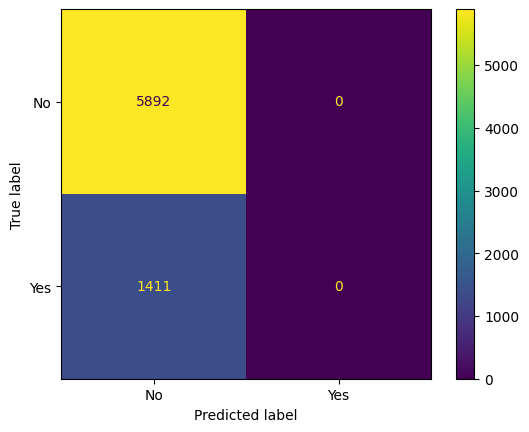

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_tunned, X_test, y_test)

In [ ]:
print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")

Acurácia (Treino): 0.8079556346706833
Acurácia (Teste): 0.8067917294262632
